<h1 style="color:rgb(0,120,170)">344.038, KV Multimedia Search and Retrieval (WS2023/24)</h1>
<h2 style="color:rgb(0,120,170)">Task 3: Group B</h2>

| First Name | Family Name  | Matr.Nr   |
|:-----------|:-------------|:----------|
| Branko     | Paunović     | K12046370 |
| Lukas      | Troyer       | K12006666 |
| Hadi       | Sanaei       | K11733444 |

# Retrieval systems

#### Import datasets, setup helper interfaces

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
np.random.seed(42)

from song import songs
from datasets import datasets, LocalDataset
from retrieval import Retrieval
from early_fusion import EarlyFusion
from late_fusion import LateFusion

#### Prompt for user input

In [2]:
# Number of similar songs to retrieve
num_top_similar = int(input("Enter the number of top similar tracks: "))

# Example:
#   - Title: Letterman
#   - Artist: Wiz Khalifa
query, query_row_id = songs.prompt_song_query()

retN = Retrieval(n=num_top_similar)

def show_top_similar(dataset: LocalDataset) -> pd.DataFrame:
    global retN, query_row_id

    top_similar = retN.top_similar_tracks(query_row_id, dataset=dataset)
    return Retrieval.create_df_from_tracks(top_similar)


## Video-Based(\<similarity\>, \<feature\>)
### 1. Inception3

In [3]:
show_top_similar(datasets.incp)

,id,similarity,song,artist,album_name
0,2wPQxBfn7e7MjdWu,0.902862,Blue Eyed Hexe,Pixies,Indie Cindy
1,Dtf7ZV2mJSpyuvdD,0.901582,Hollow Man,R.E.M.,Accelerate
2,IKEsVgEXFbIw7xc0,0.900696,House Of Love,East 17,Walthamstow
3,GY25og83Ng5O9s75,0.900293,Remind Me,Röyksopp,Melody A.M.
4,lQQp4nJxCBg0KYhP,0.898965,Looking For Clues,Robert Palmer,Clues
5,rPEtKHJnHSFag9Lr,0.898695,Misty Blue,Monica,The Boy Is Mine
6,TYoYVKiQpzhvcatl,0.898475,Without Me,Eminem,The Eminem Show
7,PWJ7cOHSo2AHLtw0,0.898033,Pure,Blackbird Blackbird,Summer Heart
8,n982UCG2cYjSkOeb,0.897939,Mire,Theatre of Tragedy,Theatre of Tragedy
9,a59KCiWbgXwk7AY7,0.897545,In My Arms,Kylie Minogue,X


### 2. VGG-19

In [4]:
show_top_similar(datasets.vgg)

,id,similarity,song,artist,album_name
0,GY25og83Ng5O9s75,0.758116,Remind Me,Röyksopp,Melody A.M.
1,6DiqMk5OTw4xE8tG,0.748836,Alison,Elvis Costello,My Aim Is True
2,UUT3MnnHgEmcJVPR,0.743280,After the Rain,John Coltrane,Impressions
3,f2tGa2kADrdE7XJX,0.739452,Oh What A Night,The Dells,At Their Very Best
4,YCrt9iFhB5Y8XXMT,0.739356,Mesmo que Mude,Bidê ou Balde,É Preciso Dar Vazão aos Sentimentos!
5,6uPetHxnKxXWek0T,0.737151,Ninety-Nine and a Half (Won't Do),Creedence Clearwater Revival,Creedence Clearwater Revival (40th Anniversary...
6,1xyy5HfCUS91Smd1,0.736269,I Want You Back,Sheryl Crow,100 Miles From Memphis
7,agAtLBENYEc284s1,0.733277,Radio Girl,Volbeat,Rock The Rebel / Metal The Devil
8,inL3Q1H10dT7oWT1,0.732715,Dance With Me,Peter Brown,A Fantasy Love Affair
9,wbnYTsrkCNoWg6FI,0.732082,Like Someone in Love,Frank Sinatra,Songs For Young Lovers


### 2. ResNet

In [5]:
show_top_similar(datasets.resnet)

,id,similarity,song,artist,album_name
0,GY25og83Ng5O9s75,0.783461,Remind Me,Röyksopp,Melody A.M.
1,gw9zZ3xtxoEjmYeB,0.777114,Locos,Cypress Hill,Elephants on Acid
2,8syTodUYnWUZtcIo,0.771750,Voodoo Child (Slight Return),Jimi Hendrix,Electric Ladyland
3,Dtf7ZV2mJSpyuvdD,0.770228,Hollow Man,R.E.M.,Accelerate
4,VSfGMu47DQFgMW4m,0.764065,Love Is The Drug,Grace Jones,Island Life
5,WgtykoE4fvPTAvxW,0.757802,White Noise,FEMM,Femm-Isation
6,5i9Rj9XyqhEfSegl,0.755106,Barbie Tingz,Nicki Minaj,Barbie Tingz
7,fVcJKhhd7UDpaEVJ,0.754682,To Tylko Tango,Maanam,The Best Of Kora & Maanam Volume 1
8,SXz8wEnJvIm7EQVU,0.754580,Volte Para O Seu Lar,Marisa Monte,Mais
9,x88qsR3ew98Unhry,0.753878,Lost In The Moment,We Came As Romans,Cold Like War


## Fusion-Based (\<similarity\>, \<feature\>)
### 1. Early Fusion (BERT + MusiCNN)

In [6]:
# Perform Early Fusion (with PCA)
ef_bert_musicnn = EarlyFusion(
    d1=datasets.lyrics_bert,
    d2=datasets.musicnn,
    n_components=0.5
)

# Add the newly created EF dataset to our datasets store
datasets.ef_bert_musicnn = LocalDataset("ef_bert_musicnn", ef_bert_musicnn.df)
show_top_similar(datasets.ef_bert_musicnn)

[Early Fusion] Down-projecting 'lyrics_bert' and 'musicnn' with PCA to 25 components


,id,similarity,song,artist,album_name
0,anGHLhCNm6LMQyJS,0.931733,BMT,Fredo,BMT
1,P8qxHDSBDJzT6NwC,0.924087,1999 WILDFIRE,BROCKHAMPTON,1999 WILDFIRE
2,OD6sfVyohxUZAO36,0.921491,Top Back,T.I.,King
3,PBFAxExx5KTjrNWE,0.921085,RIP Aretha,Dreezy,Big Dreez
4,dmj5NdY5r6mVCPjF,0.917014,Black and Yellow,Wiz Khalifa,Rolling Papers
5,kKg3iaSKjyAkNM42,0.916392,Drug Dealer,slowthai,Nothing Great About Britain
6,MTShQsdrSVjrlPFW,0.913187,I'm On One,DJ Khaled,We The Best Forever
7,M65mU1UIozrDxcvu,0.907139,Fast Lane,Bad Meets Evil,Hell: The Sequel (Deluxe)
8,6Ku7bJlCxqrwTQNi,0.904313,Double Trouble,The Roots,Things Fall Apart
9,0RswMLgk4KS4GbIP,0.902241,Zack and Codeine,Post Malone,beerbongs & bentleys


### 2. Early Fusion (BERT + MFCCs BoAWs)

In [7]:
# Perform Early Fusion (with PCA)
ef_bert_mfcc = EarlyFusion(
    d1=datasets.lyrics_bert,
    d2=datasets.mfcc_bow,
    n_components=0.5
)

# Add the newly created EF dataset to our datasets store
datasets.ef_bert_mfcc = LocalDataset("ef_bert_mfcc", ef_bert_mfcc.df)
show_top_similar(datasets.ef_bert_mfcc)

[Early Fusion] Down-projecting 'lyrics_bert' and 'mfcc_bow' with PCA to 250 components


,id,similarity,song,artist,album_name
0,QbrBgVgAfI75hR3y,0.675723,Soulja's Story,2Pac,2Pacalypse Now
1,i0DM2DOvbmy6zrnM,0.660116,Foot Fungus,SKI MASK THE SLUMP GOD,STOKELEY
2,GtDftmP0Fq5ueCh0,0.659799,Les Champs-Elysées,Joe Dassin,Les Champs-Èlysées
3,M6sUWCSbEbPcj8vv,0.658933,Both Of Em,Bhad Bhabie,Both of Em
4,iHRt8u88DH1Dq7SP,0.652032,Loyal,Chris Brown,X (Expanded Edition)
5,aqGzvg198LcJo0f6,0.651423,Whisper,VIXX LR,2nd Mini Album Whisper
6,diZ46ID9N9bB0snk,0.650937,Perplexing Pegasus,Rae Sremmurd,SR3MM
7,563sr6vvVfkIypJH,0.647027,No More Love,Bhad Bhabie,15
8,JCoVLNWgRrFWoVo5,0.633987,SHALL WE DANCE,Block B,Re:MONTAGE
9,c7MBpdUlwywl4pLd,0.629701,EveryGirl In The World,Young Money,We Are Young Money


### Late Fusion
#### EF (text/audio-based) and ResNet (video-based)
(with Rank aggregation)

In [8]:
#
# Obtain retrieval results for EF (BERT + MFCC BoAWs), MusiCNN and ResNet
#
results_ef_bert_mfcc = Retrieval.create_df_from_tracks(retN.top_similar_tracks(query_row_id, dataset=datasets.ef_bert_mfcc))
results_musicnn = Retrieval.create_df_from_tracks(retN.top_similar_tracks(query_row_id, dataset=datasets.musicnn))
results_resnet = Retrieval.create_df_from_tracks(retN.top_similar_tracks(query_row_id, dataset=datasets.resnet))

#### 2. Rank Aggregation for 

In [9]:
lf_bert_mfcc_resnet_rank = LateFusion(
    df1=results_ef_bert_mfcc,
    df2=results_resnet,
    df1_weight=0.5,
    df2_weight=0.5,
    method="rank"
)
datasets.lf_bert_mfcc_resnet_rank = LocalDataset("lf_bert_mfcc_resnet_rank", lf_bert_mfcc_resnet_rank.df)
lf_bert_mfcc_resnet_rank.df.head(n=num_top_similar)

,id,similarity_d1,song_x,artist_x,album_name_x,similarity_d2,song_y,artist_y,album_name_y,aggregated_rank,similarity
0,QbrBgVgAfI75hR3y,0.675723,Soulja's Story,2Pac,2Pacalypse Now,0.000000,0.0,0.0,0.0,8.25,0.337862
10,GY25og83Ng5O9s75,0.000000,0.0,0.0,0.0,0.783461,Remind Me,Röyksopp,Melody A.M.,8.25,0.391731
1,i0DM2DOvbmy6zrnM,0.660116,Foot Fungus,SKI MASK THE SLUMP GOD,STOKELEY,0.000000,0.0,0.0,0.0,8.75,0.330058
11,gw9zZ3xtxoEjmYeB,0.000000,0.0,0.0,0.0,0.777114,Locos,Cypress Hill,Elephants on Acid,8.75,0.388557
2,GtDftmP0Fq5ueCh0,0.659799,Les Champs-Elysées,Joe Dassin,Les Champs-Èlysées,0.000000,0.0,0.0,0.0,9.25,0.329899
12,8syTodUYnWUZtcIo,0.000000,0.0,0.0,0.0,0.771750,Voodoo Child (Slight Return),Jimi Hendrix,Electric Ladyland,9.25,0.385875
3,M6sUWCSbEbPcj8vv,0.658933,Both Of Em,Bhad Bhabie,Both of Em,0.000000,0.0,0.0,0.0,9.75,0.329467
13,Dtf7ZV2mJSpyuvdD,0.000000,0.0,0.0,0.0,0.770228,Hollow Man,R.E.M.,Accelerate,9.75,0.385114
4,iHRt8u88DH1Dq7SP,0.652032,Loyal,Chris Brown,X (Expanded Edition),0.000000,0.0,0.0,0.0,10.25,0.326016
14,VSfGMu47DQFgMW4m,0.000000,0.0,0.0,0.0,0.764065,Love Is The Drug,Grace Jones,Island Life,10.25,0.382033


# Evaluation

In [10]:
# Obtain necessary information and store for easy interop
from genres import Genres
from utils import get_retrieval_names_for_types

genres = Genres()

# TODO: check if we havent forgotten any constraints
our_chosen_retrievals = [
    # those have to be chosen because of the task description
    "random_baseline",

    "text_tf_idf",   # Task 1
    "text_bert",     # Task 1
    "text_word2vec", # Task 1

    "musicnn",       # Task 2

    "ef_bert_mfcc",  # Task 3
    "ef_bert_musicnn",
    "lf_bert_mfcc_musicnn",   # Task 3

    # the ones below have been chosen because they are the best performing ones
    # while still staying within the limits of the task description

    # one of the mfccs
    "mfcc_bow",

    # one of the video features
    "video_resnet",

    # one of the BLFs
    "blf_spectral",

    # one of the i-vectors
    "ivec256"
]


  --> Loading pickled data from pickled_state/precomputed_genres.pickle


## Accuracy
#### 1. Precision@k & Recall@k

In [11]:
from precision_recall import PrecisionRecall

pr = PrecisionRecall(genres)
pr.compute()

Calculating precision and recall for random_baseline
  --> Loading pickled data from pickled_state/precision_recall_random_baseline.pickle
Calculating precision and recall for text_tf_idf
  --> Loading pickled data from pickled_state/precision_recall_text_tf_idf.pickle
Calculating precision and recall for text_bert
  --> Loading pickled data from pickled_state/precision_recall_text_bert.pickle
Calculating precision and recall for text_word2vec
  --> Loading pickled data from pickled_state/precision_recall_text_word2vec.pickle
Calculating precision and recall for musicnn
  --> Loading pickled data from pickled_state/precision_recall_musicnn.pickle
Calculating precision and recall for mfcc_bow
  --> Loading pickled data from pickled_state/precision_recall_mfcc_bow.pickle
Calculating precision and recall for mfcc_stats
  --> Loading pickled data from pickled_state/precision_recall_mfcc_stats.pickle
Calculating precision and recall for ivec256
  --> Loading pickled data from pickled_state/

In [12]:
# pr.plot_each(our_chosen_retrievals) # i dont think it makes sense to plot
# each one in a separate plot; it just takes up space and is hard to compare

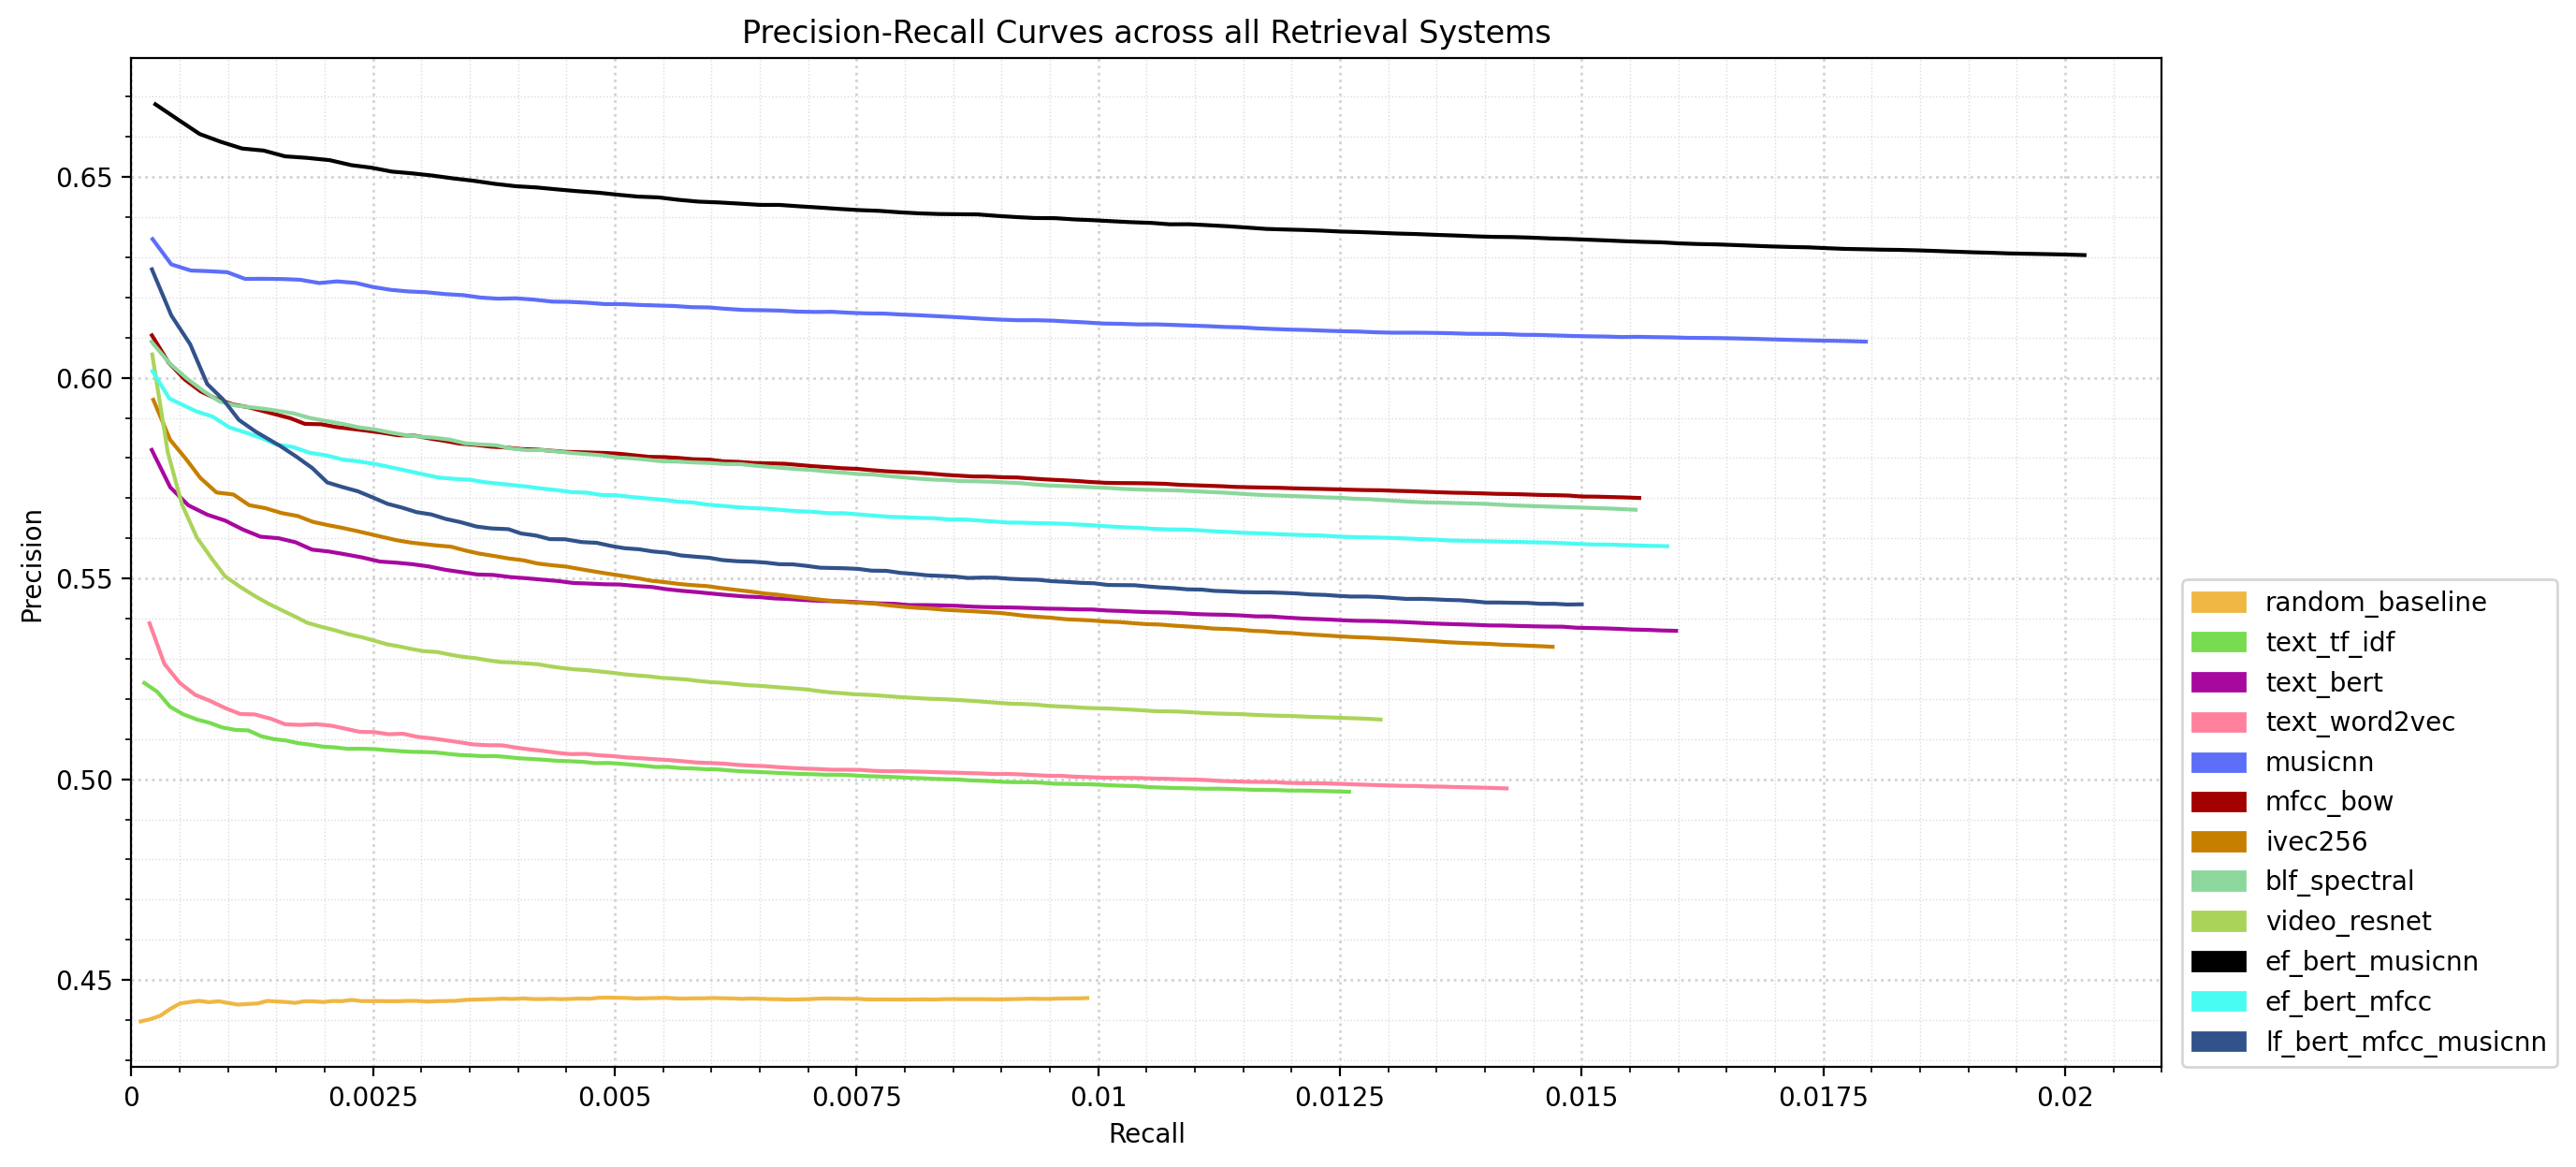

In [13]:
pr.plot_all_single(our_chosen_retrievals)

#### 2. nDCG@10

Prepared 11 chunks to compute nDCG


Computing nDCG in chunks of 1000:   0%|          | 0/11 [00:00<?, ?it/s]

  --> Loading pickled data from pickled_state/ndcg_10_chunk_0.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_1.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_2.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_3.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_4.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_5.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_6.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_7.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_8.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_9.pickle
  --> Loading pickled data from pickled_state/ndcg_10_chunk_10.pickle


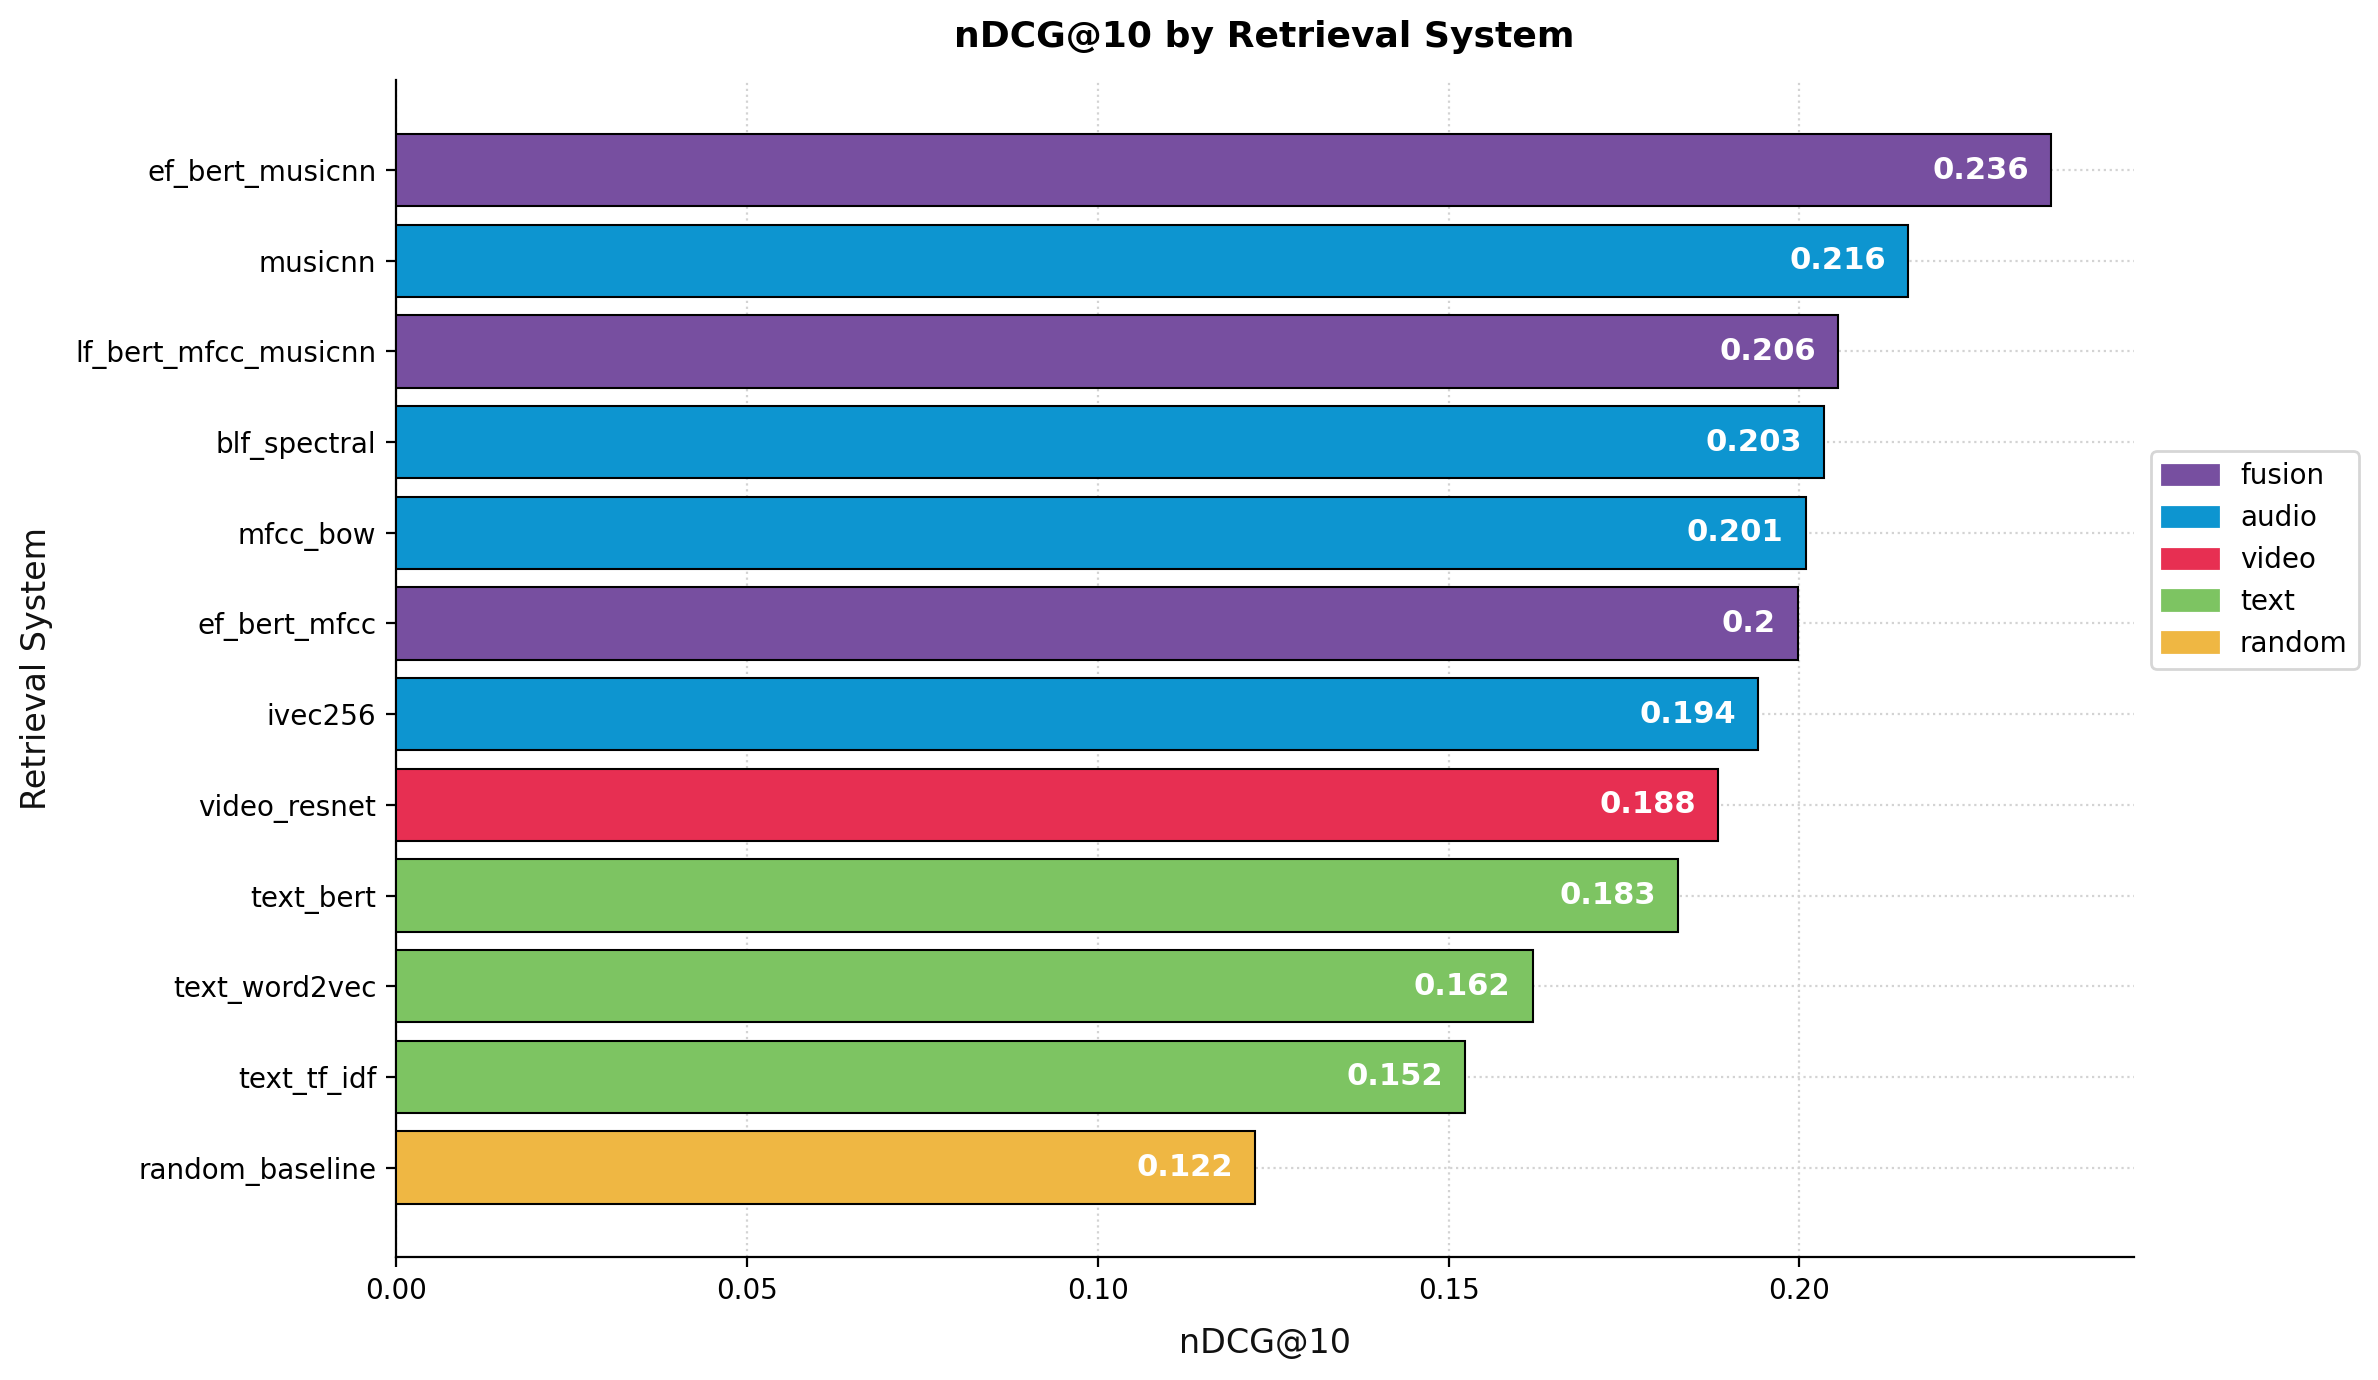

In [14]:
from ndcg import Ndcg

ndcg = Ndcg(genres)
ndcg.compute()
ndcg.plot(our_chosen_retrievals)

## Beyond Accuracy
### 1. Genre Coverage@10

  --> Loading pickled data from pickled_state/genre_coverage_random_baseline.pickle
  --> Loading pickled data from pickled_state/genre_coverage_text_tf_idf.pickle
  --> Loading pickled data from pickled_state/genre_coverage_text_bert.pickle
  --> Loading pickled data from pickled_state/genre_coverage_text_word2vec.pickle
  --> Loading pickled data from pickled_state/genre_coverage_musicnn.pickle
  --> Loading pickled data from pickled_state/genre_coverage_mfcc_bow.pickle
  --> Loading pickled data from pickled_state/genre_coverage_mfcc_stats.pickle
  --> Loading pickled data from pickled_state/genre_coverage_ivec256.pickle
  --> Loading pickled data from pickled_state/genre_coverage_ivec512.pickle
  --> Loading pickled data from pickled_state/genre_coverage_ivec1024.pickle
  --> Loading pickled data from pickled_state/genre_coverage_blf_correlation.pickle
  --> Loading pickled data from pickled_state/genre_coverage_blf_deltaspectral.pickle
  --> Loading pickled data from pickled_state

Iterating songs for 'lf_bert_mfcc_musicnn':   0%|          | 0/10094 [00:00<?, ?it/s]

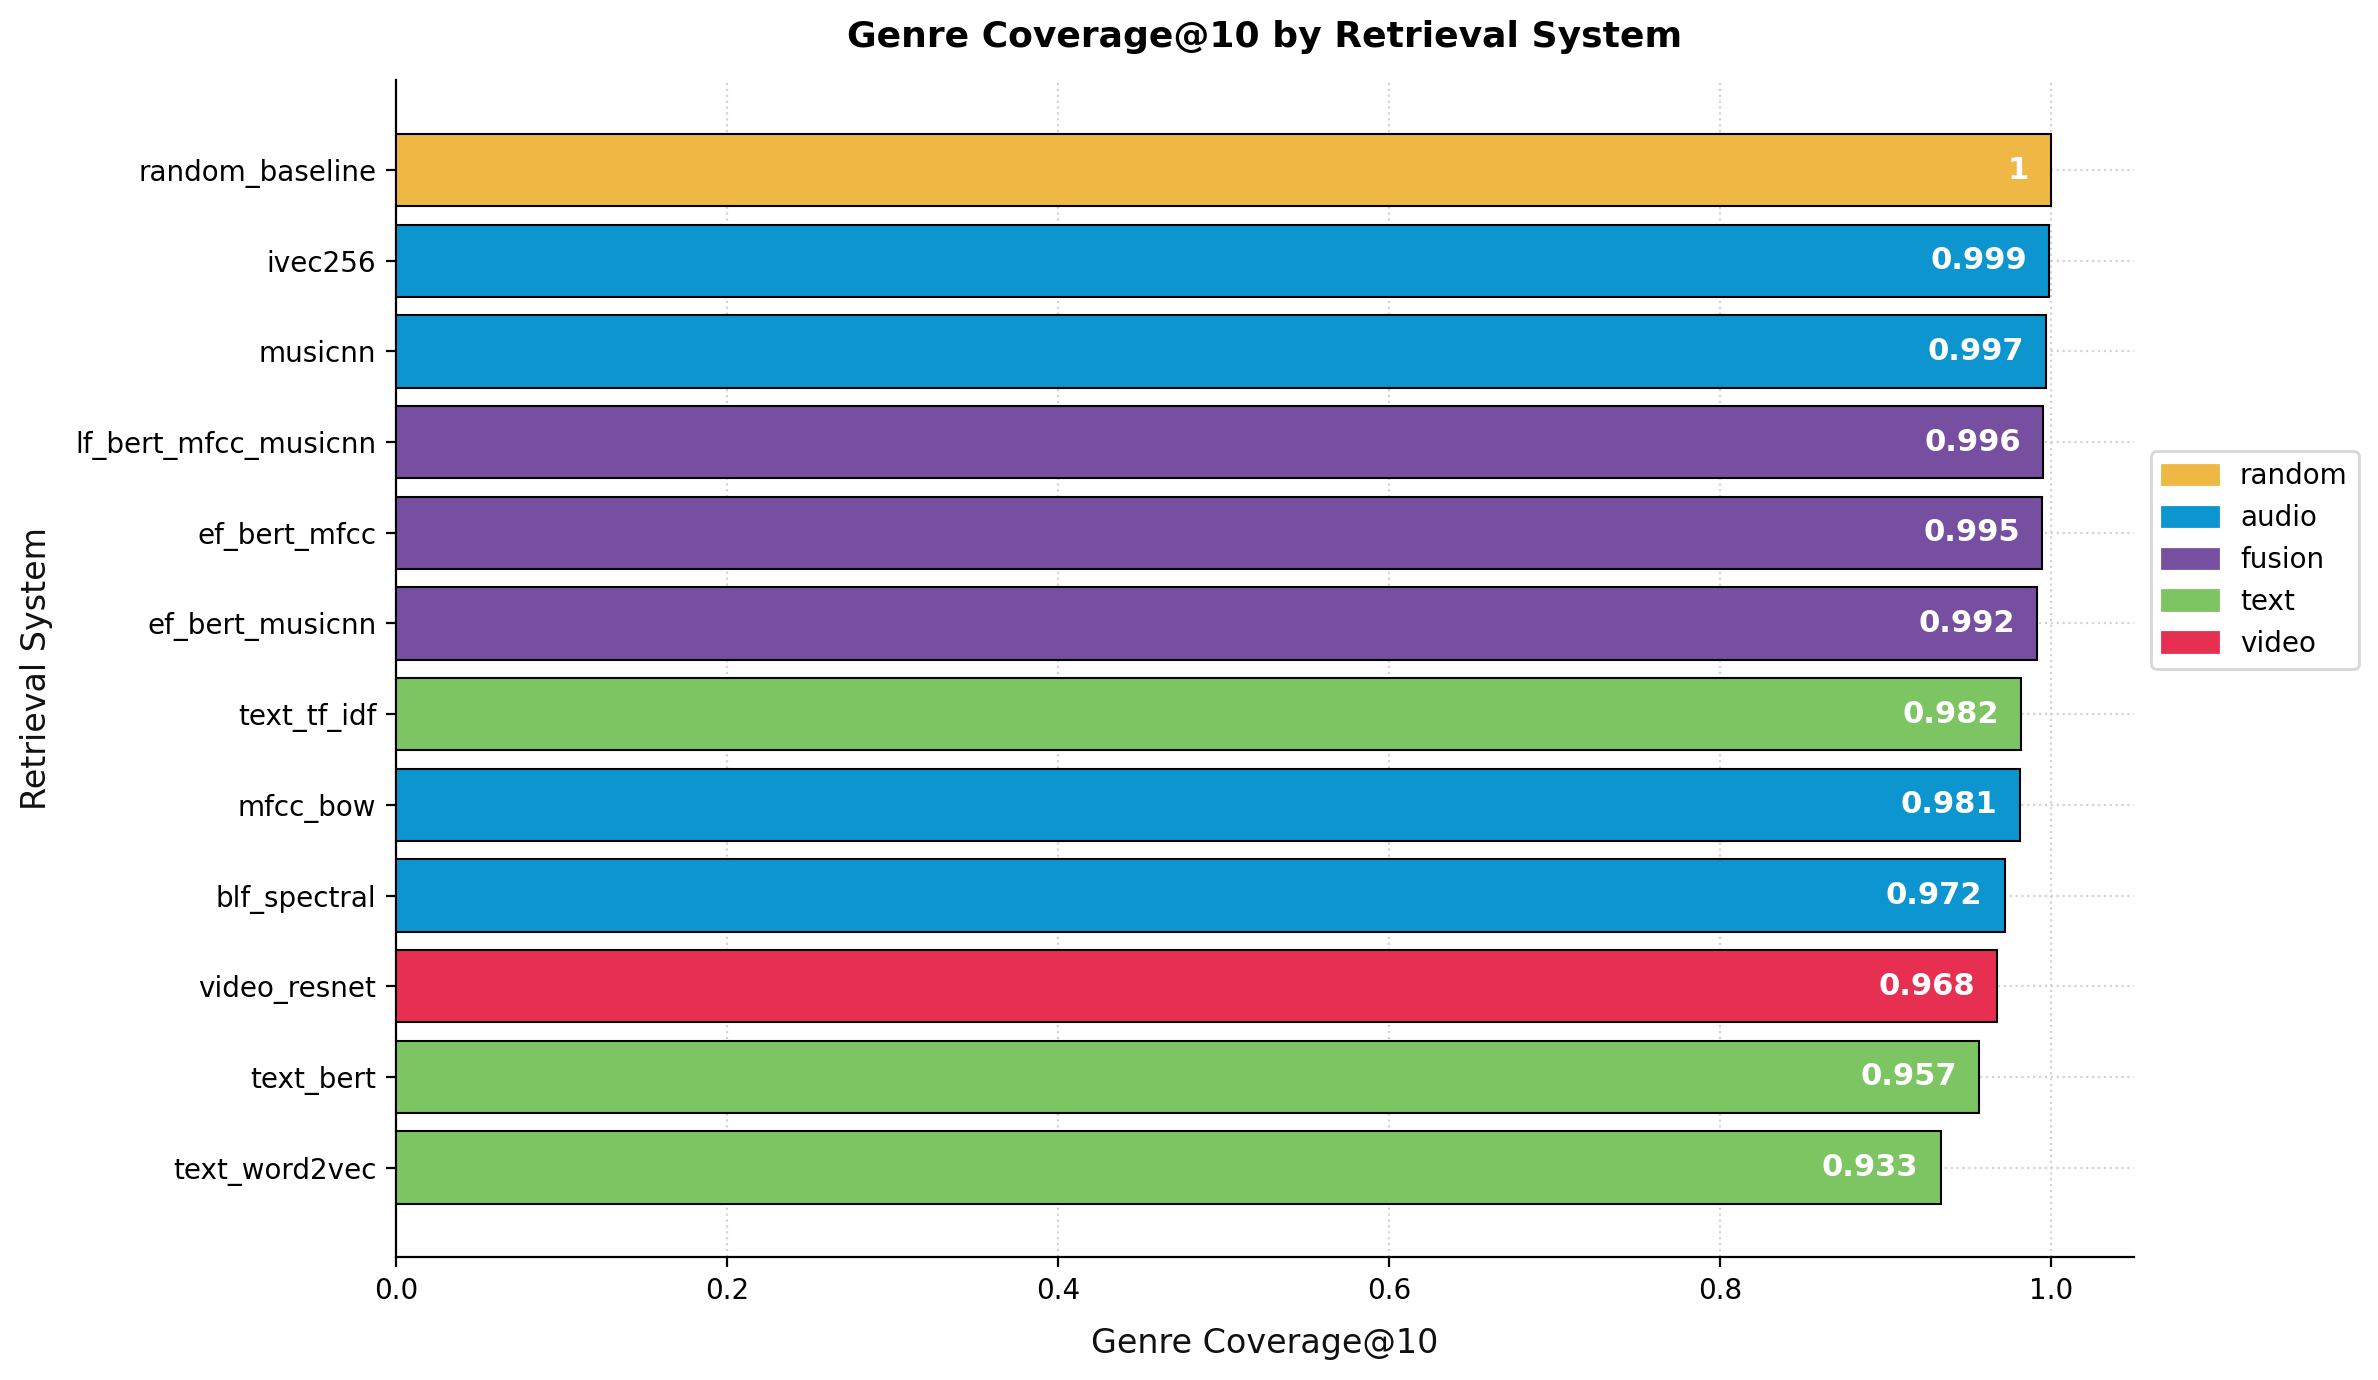

In [15]:
from genre_coverage import GenreCoverage

genres_coverage = GenreCoverage(genres)
genres_coverage.compute()
genres_coverage.plot(our_chosen_retrievals)

### 2. Genre Diversity@10

In [ ]:
from genre_diversity import GenreDiversity

genres_diversity = GenreDiversity(genres)
genres_diversity.compute()
genres_diversity.plot(our_chosen_retrievals)

  --> Loading pickled data from pickled_state/genre_diversity_random_baseline.pickle
  --> Loading pickled data from pickled_state/genre_diversity_text_tf_idf.pickle
  --> Loading pickled data from pickled_state/genre_diversity_text_bert.pickle
  --> Loading pickled data from pickled_state/genre_diversity_text_word2vec.pickle
  --> Loading pickled data from pickled_state/genre_diversity_musicnn.pickle
  --> Loading pickled data from pickled_state/genre_diversity_mfcc_bow.pickle
  --> Loading pickled data from pickled_state/genre_diversity_mfcc_stats.pickle
  --> Loading pickled data from pickled_state/genre_diversity_ivec256.pickle
  --> Loading pickled data from pickled_state/genre_diversity_ivec512.pickle
  --> Loading pickled data from pickled_state/genre_diversity_ivec1024.pickle
  --> Loading pickled data from pickled_state/genre_diversity_blf_correlation.pickle
  --> Loading pickled data from pickled_state/genre_diversity_blf_deltaspectral.pickle
  --> Loading pickled data from p

Iterating songs for 'ef_bert_musicnn':   0%|          | 0/10094 [00:00<?, ?it/s]

  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/genre_diversity_ef_bert_mfcc.pickle' for later (re-)use.


Iterating songs for 'ef_bert_mfcc':   0%|          | 0/10094 [00:00<?, ?it/s]

  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/genre_diversity_lf_bert_mfcc_musicnn.pickle' for later (re-)use.


Iterating songs for 'lf_bert_mfcc_musicnn':   0%|          | 0/10094 [00:00<?, ?it/s]

## Combined Score

<!-- F_1 score: harmonic mean of precision and recall

We want to achieve a balance between finding similar tracks, but also 

eg that we want diversity high and genre coverage low -->

justification for choosing which values we want to get high or low:
we want to achieve the "opposite" of random baseline - eg 

- precision: random baseline scores low -> we want high precision
- genre diversity: random baseline scores high -> we want low genre diversity

why? we view random baseline as the worst "system", because there is no systematic approach behind it

we want to find a balance between classical and user-centric metrics: we use 2 classical (f1 score + ndcg) and 2 user-centric (genre coverage + genre diversity) metrics; this is why we weight each metric equally (25%)

the report should be divided in 4 category sections + 1 summary section: text, audio, video, fusion; each section starts with a chart composed of combined scores of all available retrieval systems in that category - we give our justification for choosing the systems for the final comparison based on the chart; the summary section contains all other charts with just our chosen features



In [ ]:
from combined_score import CombinedScore

combined_score = CombinedScore(genres)
combined_score.compute()

combined_score.plot(get_retrieval_names_for_types(["random", "audio"]))
combined_score.plot(get_retrieval_names_for_types(["random", "video"]))
combined_score.plot(get_retrieval_names_for_types(["random", "text"]))
combined_score.plot(get_retrieval_names_for_types(["random", "fusion"]))
combined_score.plot(our_chosen_retrievals)

# Frontend

In [ ]:
# precompute retrievals (for frontend and cached lookup)

# only do this if you want to recompute the retrieval

#retrieval = Retrieval(n=100)
#retrieval.precompute_all(threads=6)

Precomputing top-100 tracks for retrieval 'text_bert':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputing top-100 tracks for retrieval 'text_word2vec':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputing top-100 tracks for retrieval 'text_tf_idf':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputing top-100 tracks for retrieval 'musicnn':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputing top-100 tracks for retrieval 'mfcc_bow':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputing top-100 tracks for retrieval 'mfcc_stats':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'mfcc_stats'


Precomputing top-100 tracks for retrieval 'ivec256':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'musicnn'


Precomputing top-100 tracks for retrieval 'ivec512':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'text_word2vec'


Precomputing top-100 tracks for retrieval 'ivec1024':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'text_tf_idf'


Precomputing top-100 tracks for retrieval 'blf_correlation':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'mfcc_bow'


Precomputing top-100 tracks for retrieval 'blf_deltaspectral':   0%|          | 0/10094 [00:00<?, ?it/s]

Precomputed results for: 'text_bert'


Precomputing top-100 tracks for retrieval 'blf_logfluc':   0%|          | 0/10094 [00:00<?, ?it/s]

In [63]:
#ret100 = Retrieval(n=100)
#ret100.precompute("blf_logfluc")

Precomputing top-100 tracks for retrieval 'blf_logfluc': 0it [00:00, ?it/s]

Precomputed results for: 'blf_logfluc'


In [ ]:
from utils import write_song_df_to_json_file

write_song_df_to_json_file("frontend/static/songMeta.json", datasets.information.df, datasets.url.df, datasets.genres.df)

# frontend uses frontend/static/songMeta.json and retrievals/*.json


In [ ]:
columns = ["retrieval system", "precision", "recall", "nDCG", "coverage", "diversity", "f1-score", "combined score"]

print("  \\begin{tabular}{llr}")

# Print table header
print("    \\toprule")
# Capitalize columns
print("    " + " & ".join(["\\textbf{" + c.capitalize() + "}" for c in columns]) + " \\\\")
print("    \\midrule")

# Print table body rows
values: list[list] = []
for ret_sys_name, metrics in combined_score._results:
    if ret_sys_name not in our_chosen_retrievals:
        continue

    values.append([
        ret_sys_name,
        metrics.precision_at_10,
        metrics.recall_at_10,
        metrics.ndcg_at_10,
        metrics.genre_coverage_at_10,
        metrics.genre_diversity_at_10,
        metrics.f1_score_at_10,
        combined_score._scores[ret_sys_name]
    ])

lines: list[str] = []

values = sorted(values, key=lambda x: x[1], reverse=False)
for v in values:
    row: list[str] = []
    for col in v:
        if not isinstance(col, str):
            row.append(f"{col:.4f}".rstrip("0").rstrip("."))
        else:
            row.append(str(col).replace("&", "\\&"))

    lines.append("    " + " & ".join(row))

print(" \\\\\n".join(lines) + " \\\\")
print("    \\bottomrule")
print("  \\end{tabular}")